# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [64]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [65]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [66]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           5.02e-23
Time:                        21:57:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

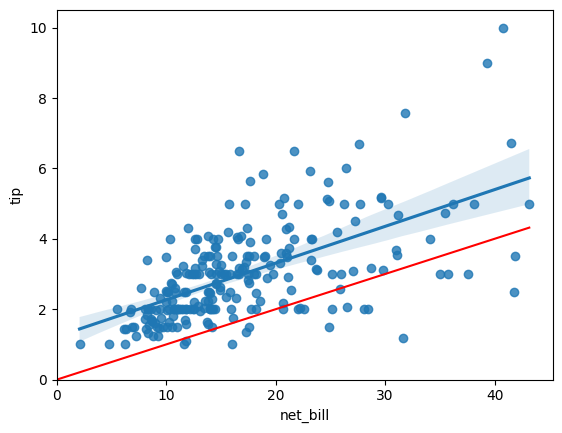

In [67]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [68]:
reg = smf.ols('tip ~ tip_pct', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.00
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           0.000139
Time:                        21:57:22   Log-Likelihood:                -417.62
No. Observations:                 244   AIC:                             839.2
Df Residuals:                     242   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5848      0.137     18.842      0.000       2.315       2.855
tip_pct        2.0458      0.528      3.873      0.000       1.005       3.086
==============================================================================
Omnibus:                       83.846   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.899
Skew:                           1.498   Prob(JB):                     8.96e-55
Kurtosis:                       6.938   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.53285)

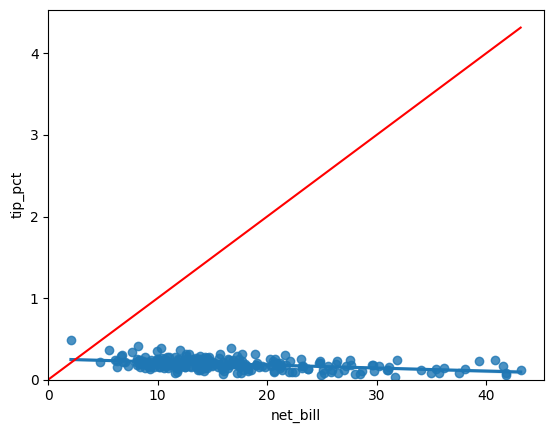

In [69]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Não é possível comparar os $R^2$s, cada gráfico aponta para uma direção diferente.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [70]:
pred = reg.fittedvalues
pred

0      2.714081
1      2.976022
2      2.993701
3      2.917205
4      2.936793
         ...   
239    3.108838
240    2.747272
241    2.782726
242    2.807562
243    2.973710
Length: 244, dtype: float64

In [71]:
tips["tip"] = tips["tip_pct"] * tips["net_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [72]:
dados_novos = tips[0:5]
dados_novos
reg.predict(dados_novos)

0    2.714081
1    2.976022
2    2.993701
3    2.917205
4    2.936793
dtype: float64

In [73]:
reg = smf.ols('tip ~ tip_pct', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.00
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           0.000139
Time:                        21:57:22   Log-Likelihood:                -417.62
No. Observations:                 244   AIC:                             839.2
Df Residuals:                     242   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5848      0.137     18.842      0.000       2.315       2.855
tip_pct        2.0458      0.528      3.873      0.000       1.005       3.086
==============================================================================
Omnibus:                       83.846   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.899
Skew:                           1.498   Prob(JB):                     8.96e-55
Kurtosis:                       6.938   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aparentemente os dois ficaram identicos.